In [2]:
import numpy as np
import pylab
import pandas as pd
import statsmodels.api as sm
import matplotlib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

<AxesSubplot:>

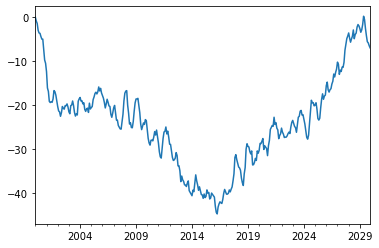

In [10]:
n = 12 * 30

startdate = '2000-01-01'
daterange = pd.date_range(start=startdate, periods=n, freq='M')

empty_dataset = np.zeros(n)
mod = SARIMAX(empty_dataset, order=(1, 1, 0), seasonal_order=(1, 0, 1, 12), initialization='diffuse')
series = pd.Series(mod.simulate([0.3, 0.2, 0.5, 1], n), index=daterange)
series.plot()

<AxesSubplot:>

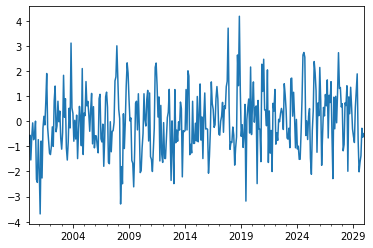

In [11]:
series.diff().dropna().plot()

<AxesSubplot:>

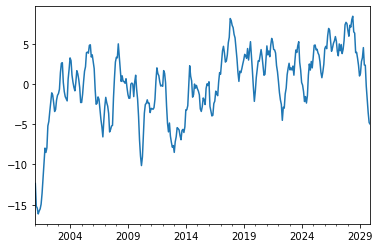

In [12]:
series.diff(12).dropna().plot()

<AxesSubplot:>

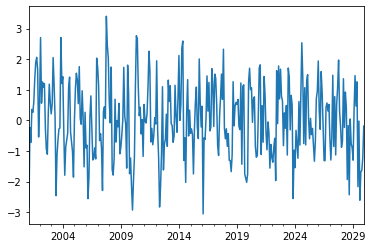

In [13]:
series.diff().diff(12).dropna().plot()

In [18]:
diffs = series.diff().dropna()

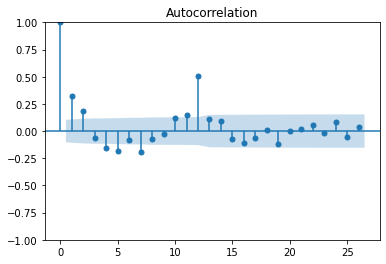

In [19]:
acf_plot = plot_acf(diffs)

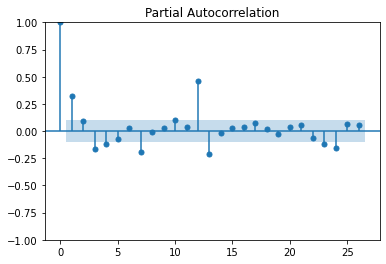

In [20]:
pacf_plot = plot_pacf(diffs, method='ywm')

In [21]:
train_end = datetime(2028, 1, 1)

train_data = series[:train_end]
test_data = series[train_end :]

In [27]:
model = sm.tsa.statespace.SARIMAX(train_data, order=(1, 1, 0), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  336
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -463.471
Date:                              Mon, 07 Feb 2022   AIC                            934.941
Time:                                      19:59:52   BIC                            950.198
Sample:                                  01-31-2000   HQIC                           941.024
                                       - 12-31-2027                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3565      0.051      7.032      0.000       0.257       0.456
ar.S.L12       0.33

In [25]:
model = sm.tsa.statespace.SARIMAX(train_data, order=(1, 1, 2), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit()
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -461.936
Date:                              Mon, 07 Feb 2022   AIC                            935.873
Time:                                      19:59:28   BIC                            958.757
Sample:                                  01-31-2000   HQIC                           944.996
                                       - 12-31-2027                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1867      0.281      0.665      0.506      -0.364       0.737
ma.L1          0.15

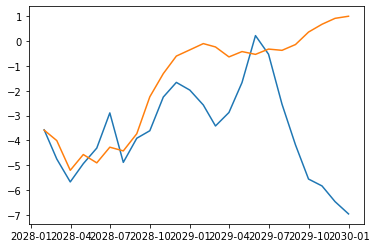

In [28]:
pylab.plot(test_data)
pylab.plot(model_fit.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=True))

In [108]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = series[:train_end-timedelta(days=1)]
    model = sm.tsa.statespace.SARIMAX(train_data, order=(0, 1, 0), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

Text(0, 0.5, 'Error')

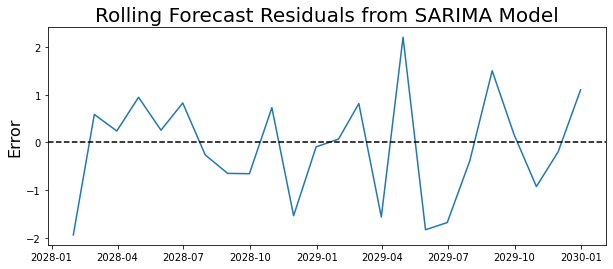

In [109]:
rolling_residuals = test_data - rolling_predictions
pylab.figure(figsize=(10,4))
pylab.plot(rolling_residuals)
pylab.axhline(0, linestyle='--', color='k')
pylab.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
pylab.ylabel('Error', fontsize=16)

For another example, see this analysis from Sean Abu https://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

The ridership data can obtained here http://ftp.uni-bayreuth.de/math/statlib/general/tsa2/cryer/cryer.htm